<a href="https://colab.research.google.com/github/anantagr/Advance-House-pricing-prediction/blob/main/Advance_house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the required libraries**

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To display all columns of the pandas dataframe
pd.pandas.set_option('display.max_columns', None)

# for feature slection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

## **Mounting Google drive to access data files**

In [442]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading Train.csv to Dataframe**

In [443]:
path_to_train_csv = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data/train.csv'
df_train=pd.read_csv(path_to_train_csv)

path_to_test_csv = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data/test.csv'
df_test=pd.read_csv(path_to_test_csv)

print('Train data shape:{}'.format(df_train.shape))
print('Test data shape:{}'.format(df_test.shape))


Train data shape:(1460, 81)
Test data shape:(1459, 80)


In [444]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [445]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **Exploratory Data Analysis**

#### In EDA, we will find out:
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


In [446]:
New_feat_in_Train = [feature for feature in df_train.columns if feature not in df_test.columns]
New_feat_in_Test = [feature for feature in df_test.columns if feature not in df_train.columns]

print('Additional features in train data: {}'.format(New_feat_in_Train))
print('Additional features in test data: {}'.format(New_feat_in_Test))


Additional features in train data: ['SalePrice']
Additional features in test data: []


## **Missing Values**

### **Visualizing missing values with seaborn**

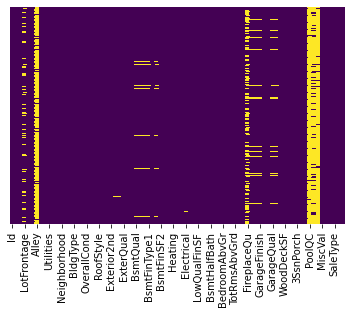

In [447]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **Creating a list for features with missing values**

In [448]:
# Make a seperate list of all the features which has missing values
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]


# Print the name of the feature with missing values and %tage of missing values
for feature in features_with_na:
  print(feature, np.round(df_train[feature].isnull().mean(), 4), ' % of missing values')

LotFrontage 0.1774  % of missing values
Alley 0.9377  % of missing values
MasVnrType 0.0055  % of missing values
MasVnrArea 0.0055  % of missing values
BsmtQual 0.0253  % of missing values
BsmtCond 0.0253  % of missing values
BsmtExposure 0.026  % of missing values
BsmtFinType1 0.0253  % of missing values
BsmtFinType2 0.026  % of missing values
FireplaceQu 0.4726  % of missing values
GarageType 0.0555  % of missing values
GarageYrBlt 0.0555  % of missing values
GarageFinish 0.0555  % of missing values
GarageQual 0.0555  % of missing values
GarageCond 0.0555  % of missing values
PoolQC 0.9952  % of missing values
Fence 0.8075  % of missing values
MiscFeature 0.963  % of missing values


### **Relation between missing values and dependent feature(Sale price $$)**

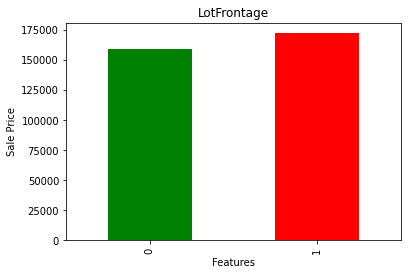

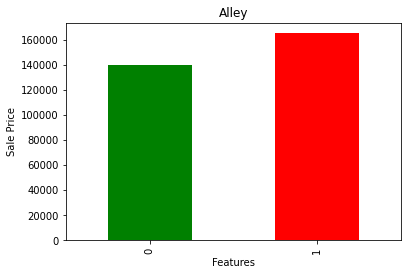

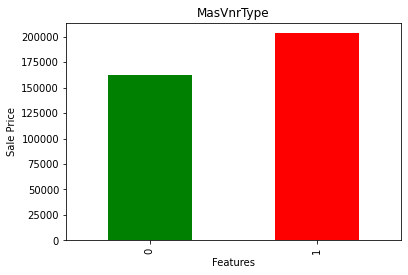

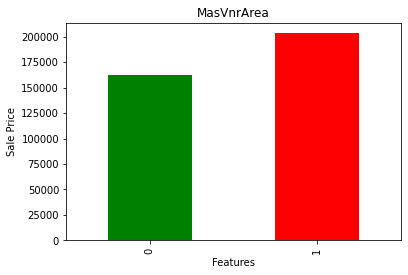

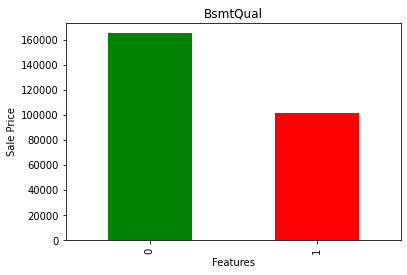

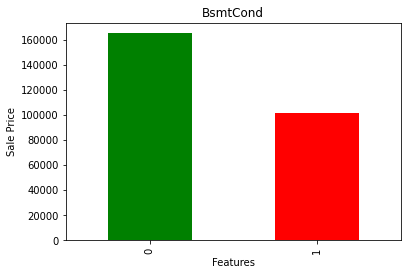

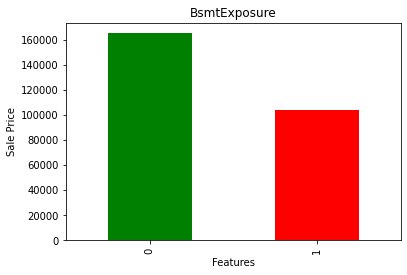

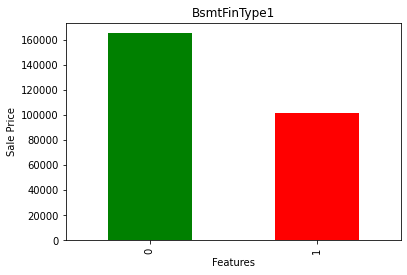

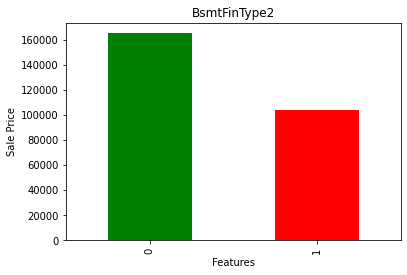

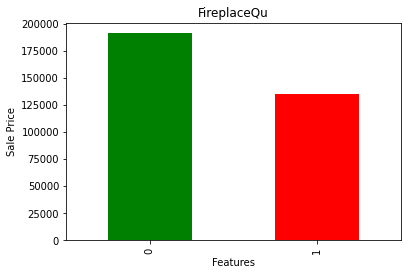

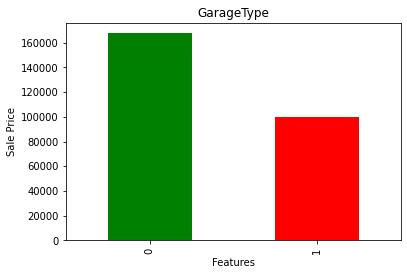

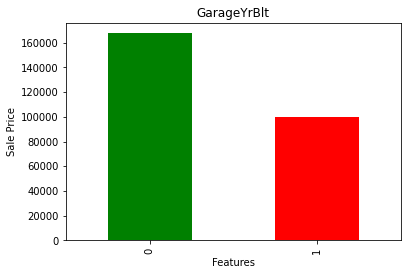

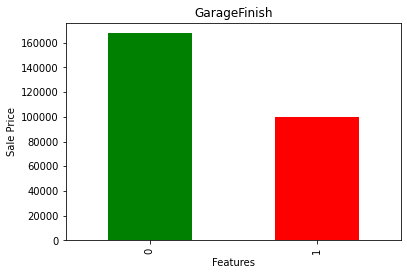

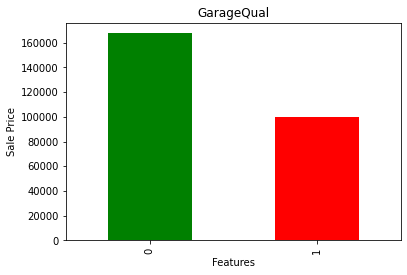

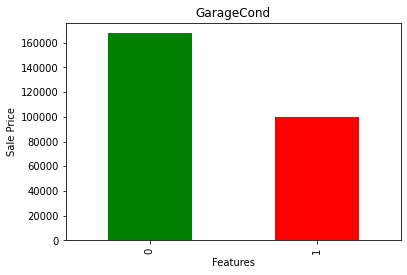

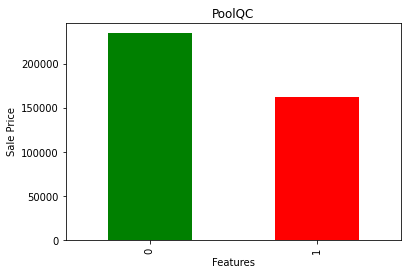

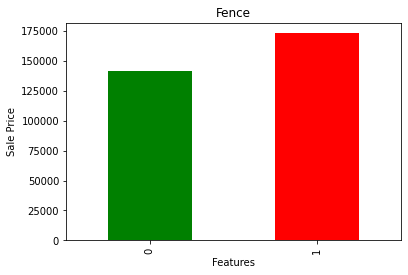

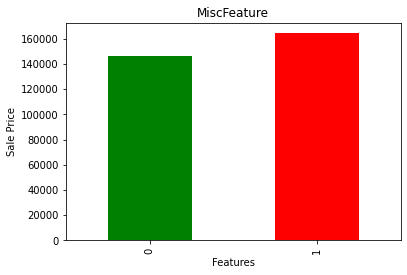

In [449]:
for feature in features_with_na:
  data = df_train.copy()

  #Assigning 1 if the selected feature is missing a value and 0 if not
  data[feature] = np.where(data[feature].isnull(), 1, 0)

  #Plot Sale price mean price for missing values and for non-missing values
  data.groupby(feature)['SalePrice'].median().plot.bar(color = ['green', 'red',])
  plt.title(feature)
  plt.ylabel('Sale Price') 
  plt.xlabel('Features') 
  plt.show()

### **Inference**
It is evident that missing values in different features are playing an important role in determining the final sale price, so we cannot simply delete the missing value rows but instead replace them with something meaningful.

## **Dropping unnecessary column**


*   ID of homes



In [450]:
print ("ID of homes {}".format(len(df_train.Id)))

ID of homes 1460


## **Numerical variable**

In [451]:
#Make a seperate list for all numerical features (their datatype != objects)
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']

print('Number of numerical features = ', len(numerical_features))

#Show only numerical features from df_train
df_train[numerical_features].head()

Number of numerical features =  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## **Find temporal variable (E.g. Datatime Variable)**

We will convert the year value such as year of purchase or year sold to numerical value by converting it to number of years in Feature Engineering.


In [452]:
#Make a list of features containing Year related values
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print('Year related features are ', year_features)

Year related features are  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


### **Finding relation between temporal variable (Year related features) with dependent variable (Sale price)**

---
Year related features are:


1.   Year built
2.   Year remodelled
3.   Year when garage was built
4.   Year house was sold




In [453]:
 #Finding unique entries in year_features
for feature in year_features:
  print("Feature name: ", feature, '\n Unique Values: \n', df_train[feature].unique(), '\n')

Feature name:  YearBuilt 
 Unique Values: 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

Feature name:  YearRemodAdd 
 Unique Values: 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

Feature name:  GarageYrBl

Relationship between **YearBuilt** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Built')

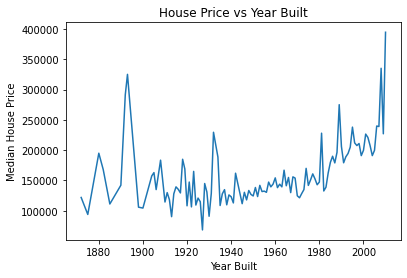

In [454]:
df_train.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Built')

This graph shows a trend that as the years are passing by the price of the house is increasing, which is the exected trend.

* Recently built houses are higher priced




Relationship between **Year remodelled** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Remodelled')

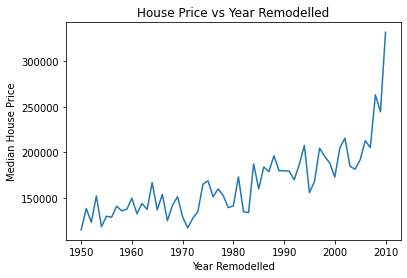

In [455]:
df_train.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.xlabel('Year Remodelled')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Remodelled')

This graph shows a trend that as the years are passing by the price of the house is increasing, which is the exected trend.

* Recently remodelled houses are higher priced

Relationship between **Year Garage built** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Garage Built')

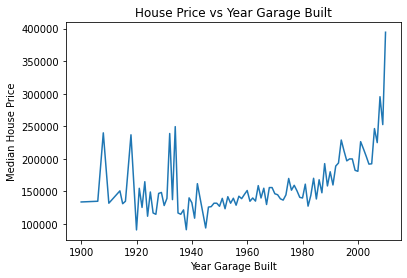

In [456]:
df_train.groupby('GarageYrBlt')['SalePrice'].median().plot()
plt.xlabel('Year Garage Built')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Garage Built')

This graph shows a trend that as the years are passing by the price of the house is increasing, which is the exected trend.

* Houses with garages have been built recently are higher priced


Relationship between **Year Sold** and **SalePrice**

Text(0.5, 1.0, 'House Price vs Year Sold')

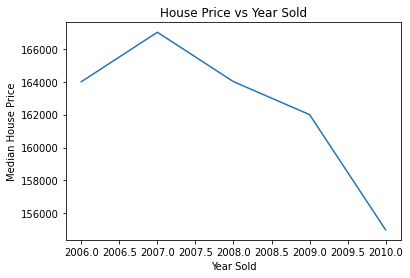

In [457]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

In this graph, the trend seems to be broken. 
* The houses have been sold at lower prices compared to previous years.

This trend does not seem to representing true picture so we will further investigate this.

Relation between **number of years** and **Sale price** using Scatter plot

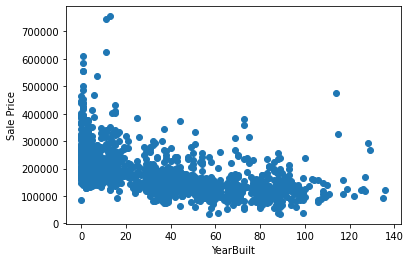

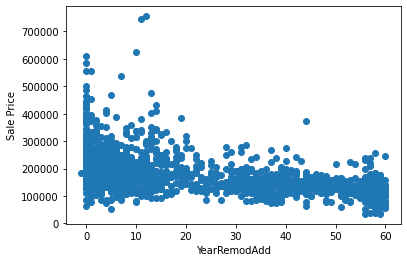

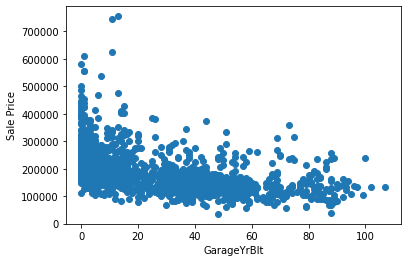

In [458]:
for feature in year_features:
  if feature!= 'YrSold':
    data=df_train.copy()

    #Calculate the difference of years between selected feature and the year house was sold
    data[feature]=data['YrSold'] - data[feature]

    x = data[feature]
    y = data['SalePrice']

    plt.scatter(x, y)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')

    plt.show()


### **Inference**

These scatter graphs makes more sense as we can see prices for more recently built or remodelled houses or recently built garage is higher. 
We will further explore this in Feature Engineering section

## **Discrete numerical features and Continuous numerical features**



*   **Discrete Feature** - Number of unique categories in dataset is **less than 25** and should NOT be in **year_features** and NOT be **ID** feature
*   **Continuous Feature** - Number of unique categories in dataset is **more than or equal to 25**



### **Discrete Variable**

In [459]:
 # Make a seperate list for Discrete numerical features
 discrete_features = [feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_features + ['Id']]

# print discrete features
print("Discrete feature count: {} \n".format(len(discrete_features)))

print('Discrete features are: ')
discrete_features

Discrete feature count: 17 

Discrete features are: 


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [460]:
df_train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


### **Finding relation between Discrete variable features with dependent variable (Sale price)**

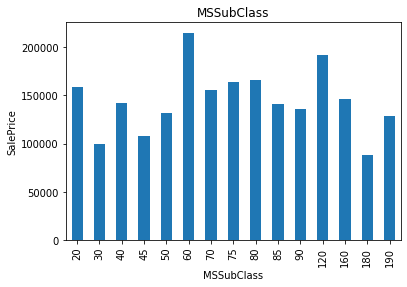

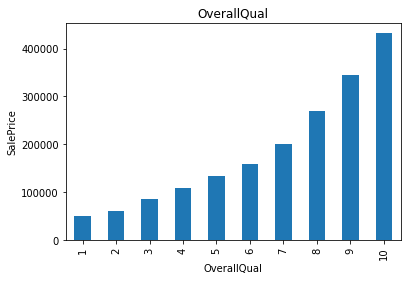

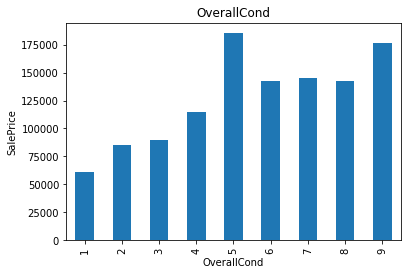

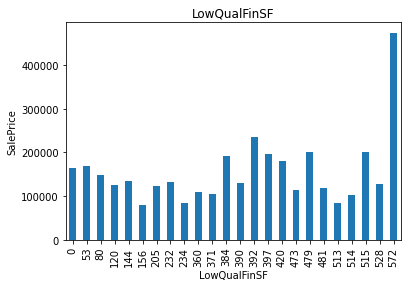

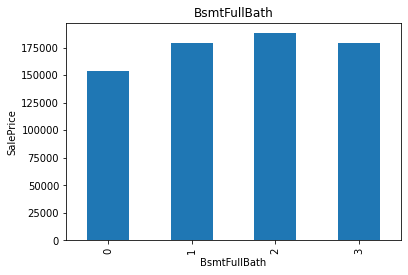

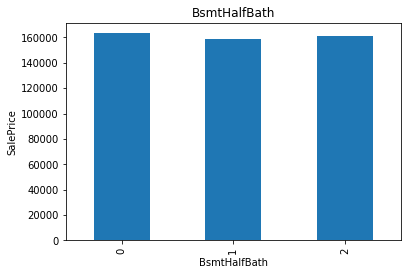

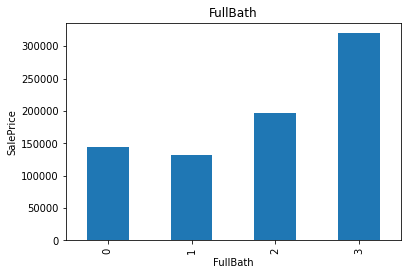

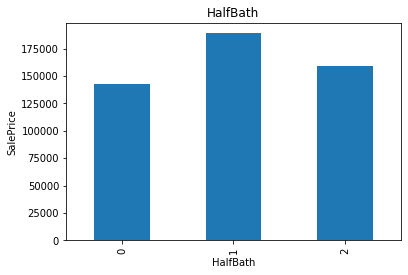

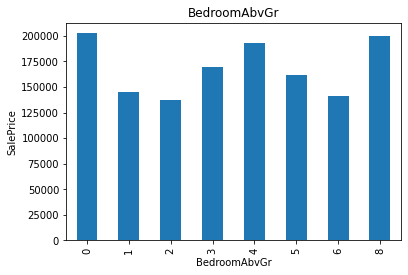

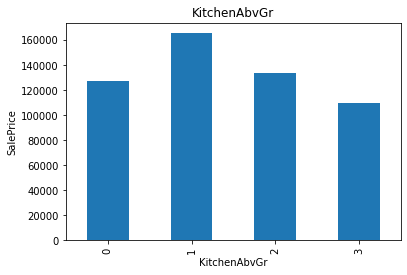

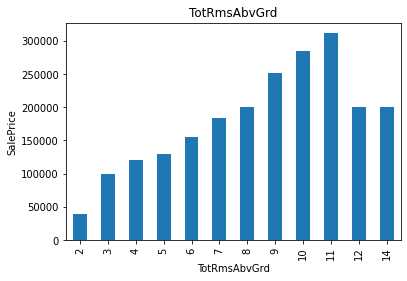

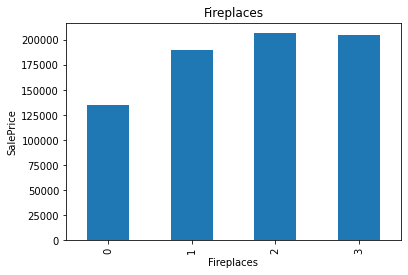

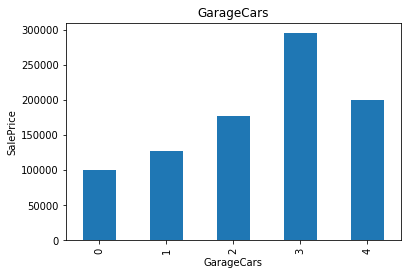

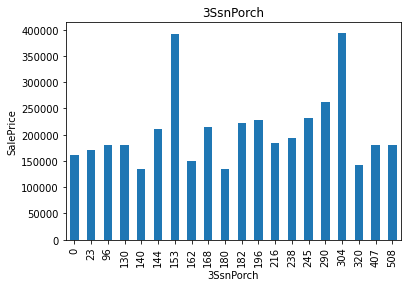

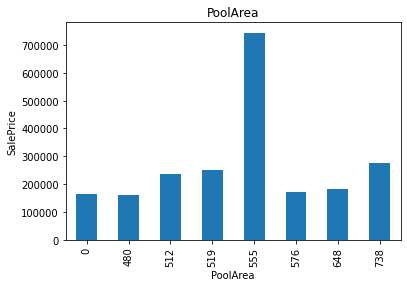

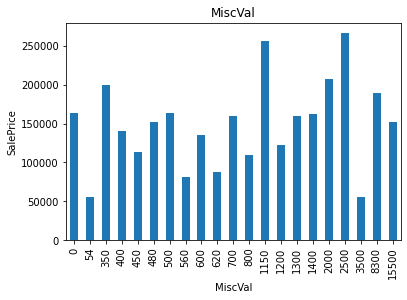

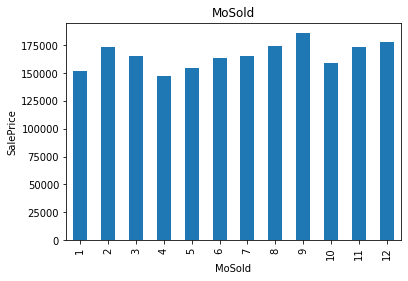

In [461]:
for feature in discrete_features:
  data = df_train.copy()
  y = data.groupby(feature)['SalePrice'].median()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

### **Inference**

All discrete features have some relation with Sale Price.

### **Continuous Variable**

In [462]:
 # Make a seperate list for Continuous numerical features
 continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features + ['Id']]

# print continuous features
print("Continuous feature count: {} \n".format(len(continuous_features)))

print('Continuous features are: ')
continuous_features

Continuous feature count: 16 

Continuous features are: 


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [463]:
df_train[continuous_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


### **Finding distribution of the Continuous values**

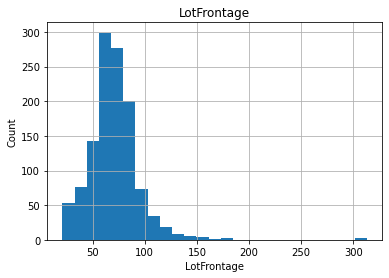

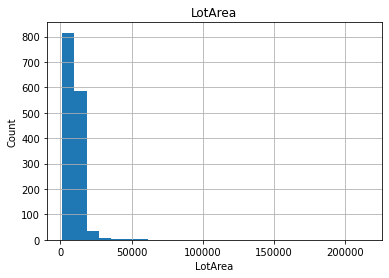

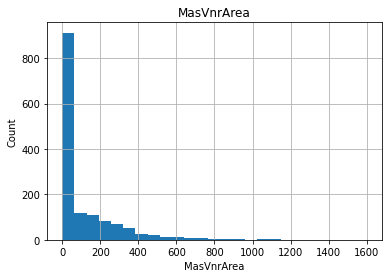

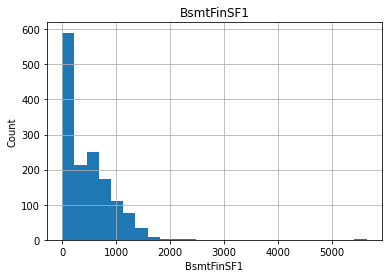

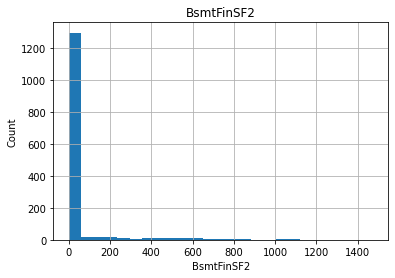

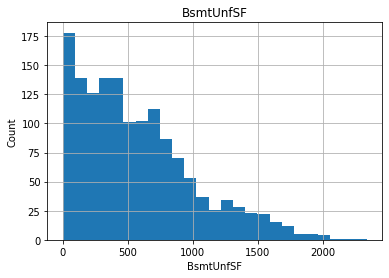

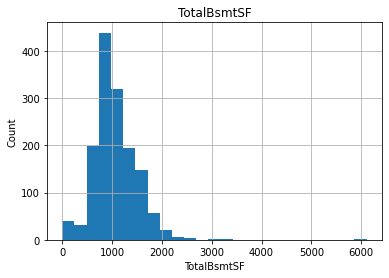

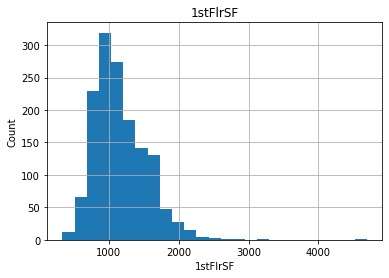

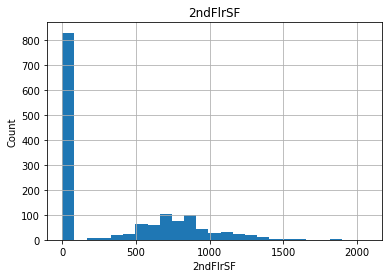

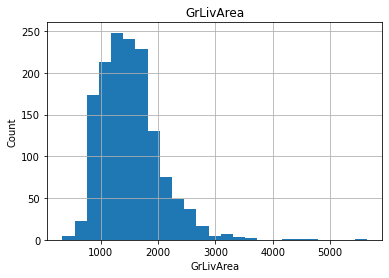

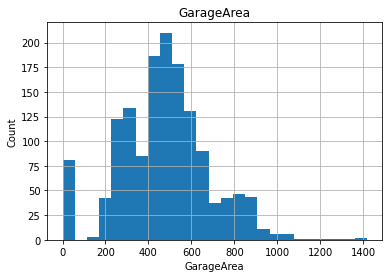

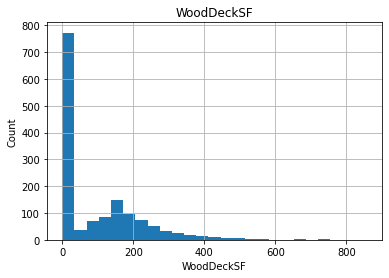

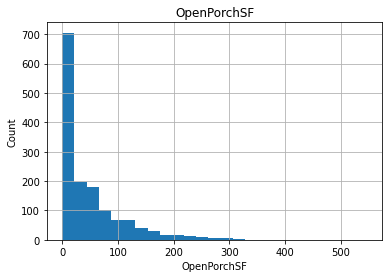

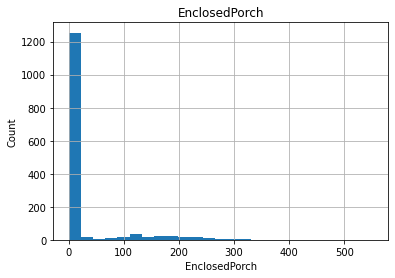

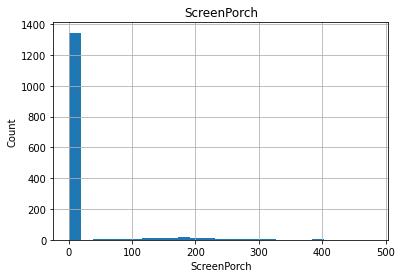

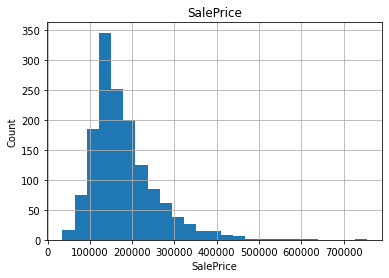

In [464]:
# As these are continuous variable, we will use Histograms to find the relation with the Sale Price.
for feature in continuous_features:
  data=df_train.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()


### **Inference**
Some of the features have Gaussian distribution but many are skewed left or right.
In Feature Engineering section, we will apply Transformation technique to achive Gaussian (Normal) distribution for these features.

## **Applying Transformations on Dataset**

As evident from last section, we will apply log normal transformation on the Numerical continuous features to make the data more normally distributed.

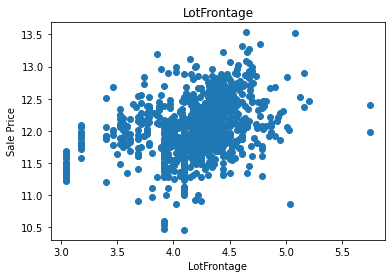

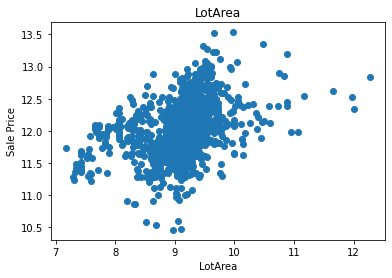

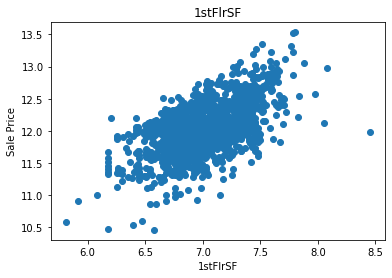

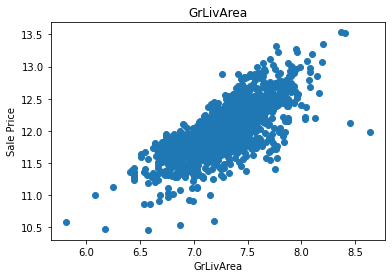

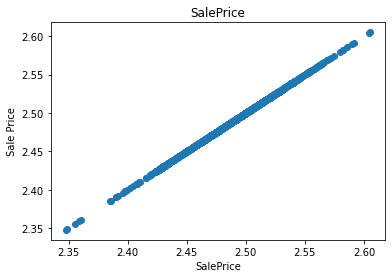

In [465]:
#Applying log transformation

for feature in continuous_features:
  data=df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature]) #Log transformation on all numerical features
    data['SalePrice'] = np.log(data['SalePrice']) #Log transformation on Sales price

    #Plotting a scatter graph after log transformation to see the distribution
    x = data[feature]
    y = data['SalePrice']

    plt.scatter(x, y)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

### **Inference**

There seem to have a monotonic relationship, i.e. the Sale price is increasing as the feature value is incresing.

## **Checking the outliers** 
We will visualize outliers in the continuous numerical features

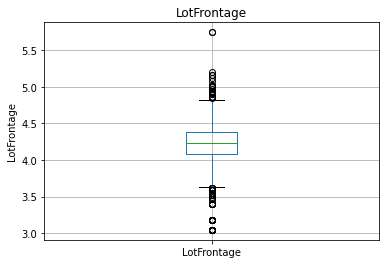

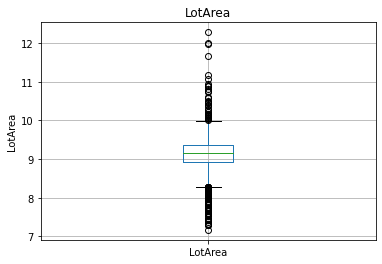

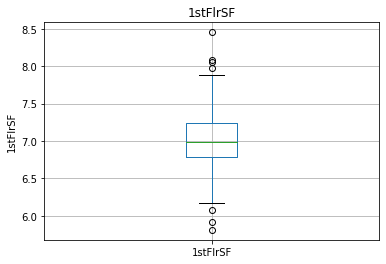

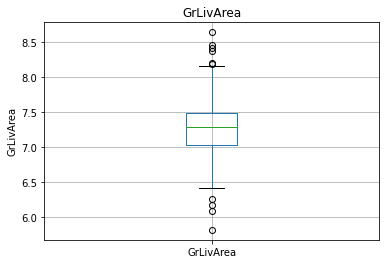

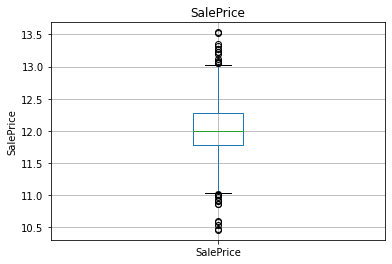

In [466]:
# We will create a box plot to visualize the outliers in features

for feature in continuous_features:
  data=df_train.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature]) #Log transformation on all categorical features
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


## **Categorical Variables**

In [467]:
#Make a seperate list for categorical features
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype == 'O']

# print continuous features
print("Categorical feature count: {} \n".format(len(categorical_features)))

print('Continuous features are: ')
categorical_features


Categorical feature count: 43 

Continuous features are: 


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [468]:
df_train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### **Cardinality value** of Categorical feature
We will see how many distinct categories each of these categorical feature has. 

In [469]:
for feature in categorical_features:
  print('Number of distinct categories in feature {} are {}'.format(feature, len(df_train[feature].unique())))

Number of distinct categories in feature MSZoning are 5
Number of distinct categories in feature Street are 2
Number of distinct categories in feature Alley are 3
Number of distinct categories in feature LotShape are 4
Number of distinct categories in feature LandContour are 4
Number of distinct categories in feature Utilities are 2
Number of distinct categories in feature LotConfig are 5
Number of distinct categories in feature LandSlope are 3
Number of distinct categories in feature Neighborhood are 25
Number of distinct categories in feature Condition1 are 9
Number of distinct categories in feature Condition2 are 8
Number of distinct categories in feature BldgType are 5
Number of distinct categories in feature HouseStyle are 8
Number of distinct categories in feature RoofStyle are 6
Number of distinct categories in feature RoofMatl are 8
Number of distinct categories in feature Exterior1st are 15
Number of distinct categories in feature Exterior2nd are 16
Number of distinct categori

Based on the result above, some feature have large number of unique categories, such as:

* **Condition1** has 9 distinct categories
* **Neighborhood** has 25 distinct categories
* **Exterior1st** has 15 distinct categories
* **Exterior2nd** has 16 distinct categories
* **SaleType** has 9 distinct categories

In Feature engineering, we will use a different method for encoding these features, rest all can be encoded using One-Hot encoding.


### Relation between **Categorical feature** and **Dependent variable (Sale Price)**

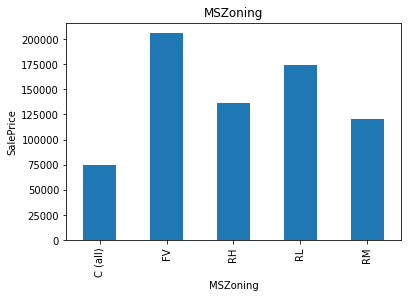

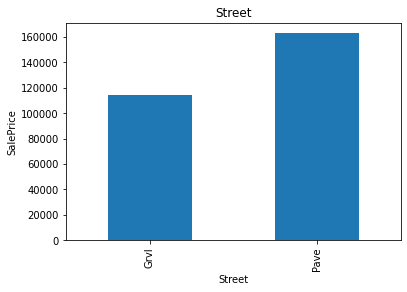

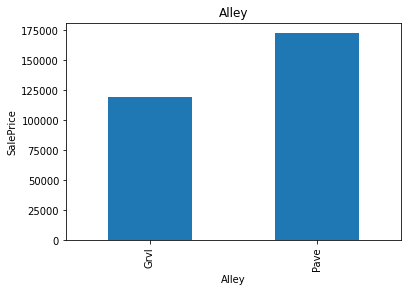

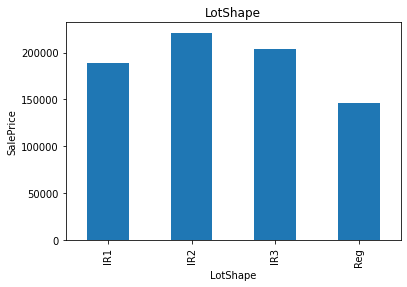

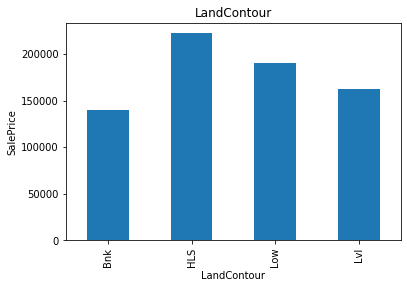

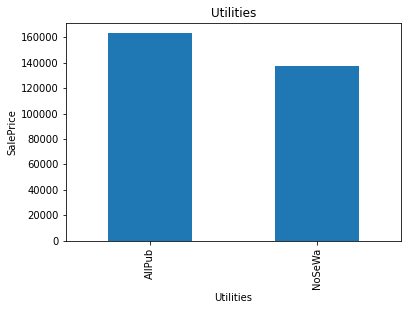

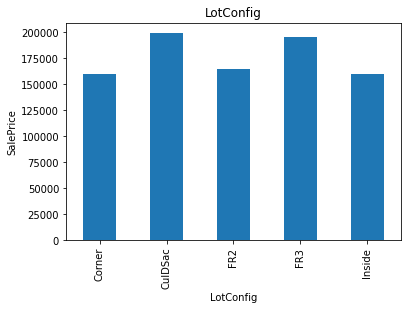

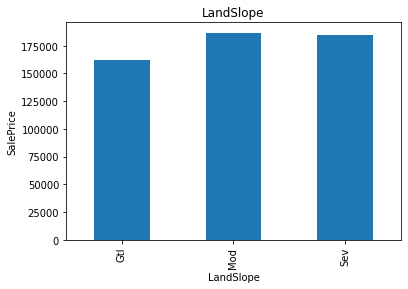

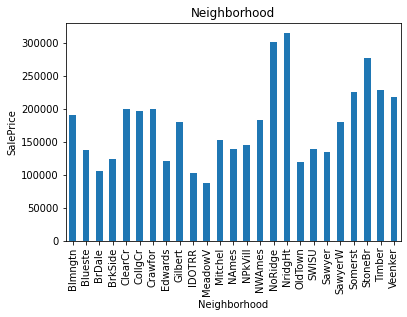

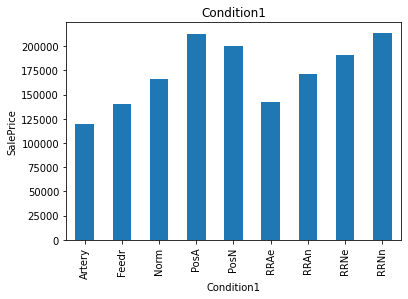

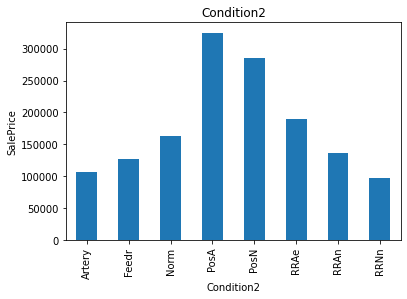

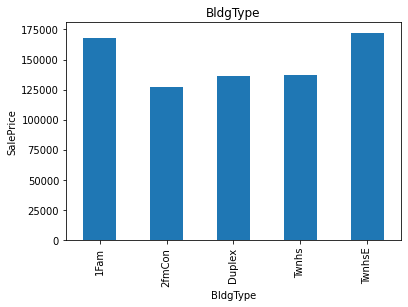

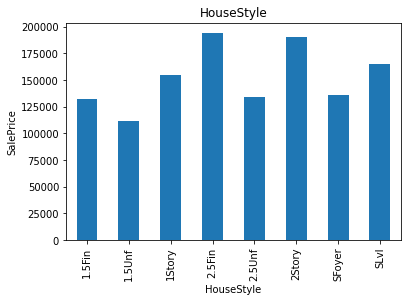

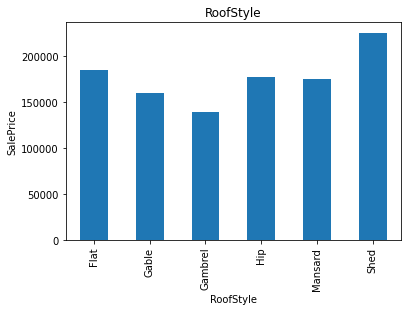

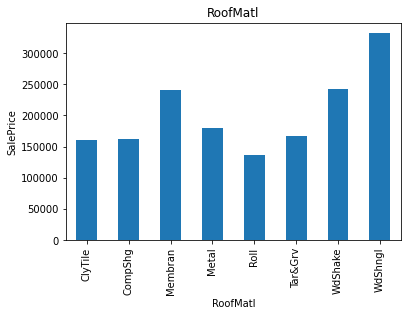

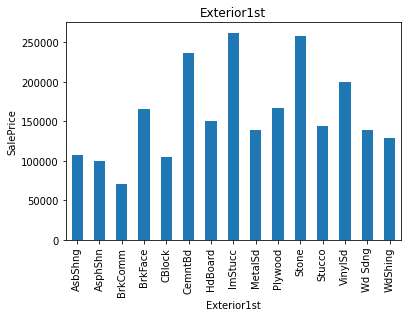

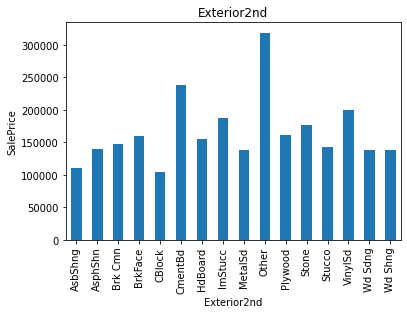

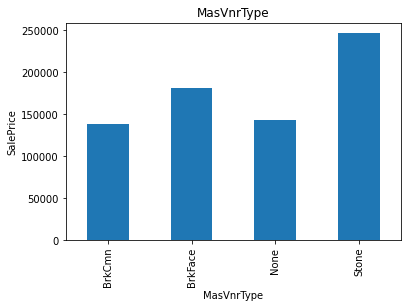

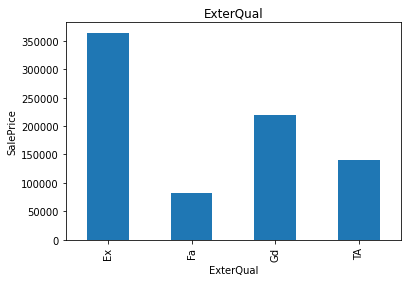

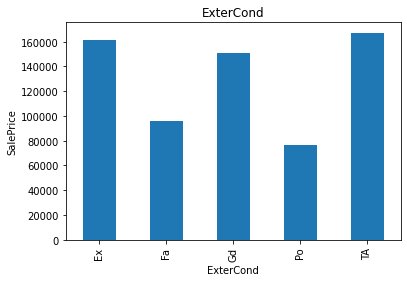

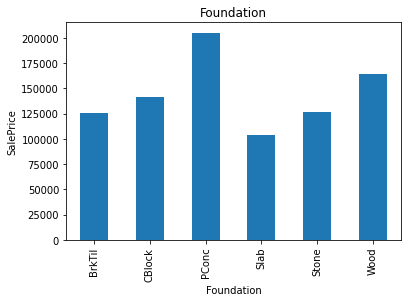

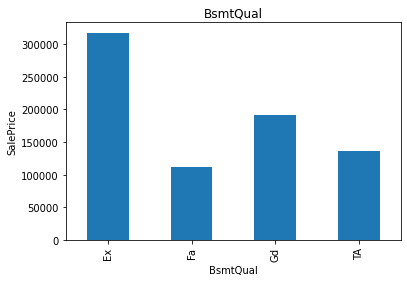

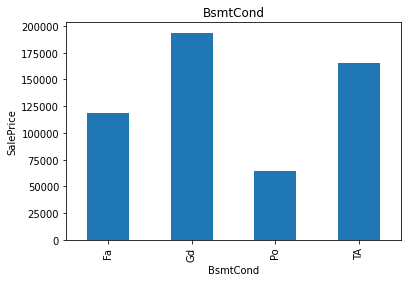

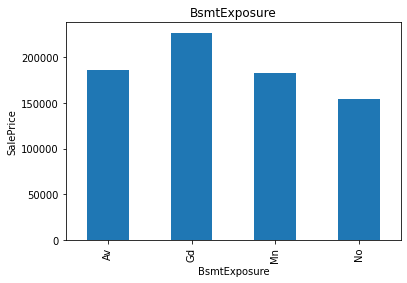

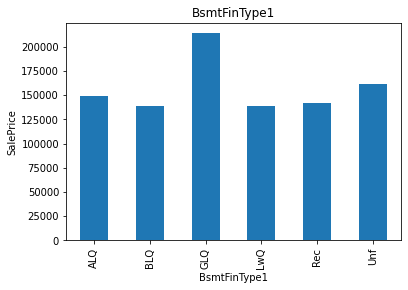

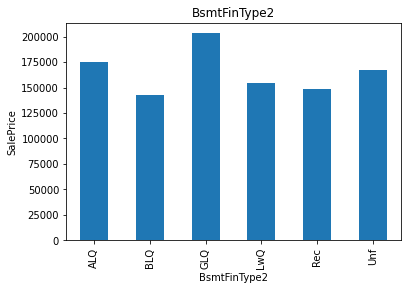

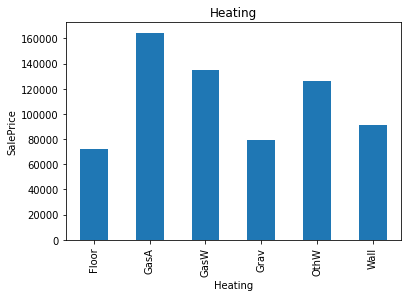

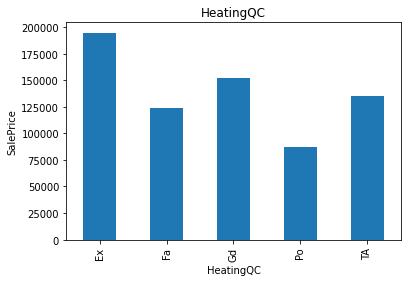

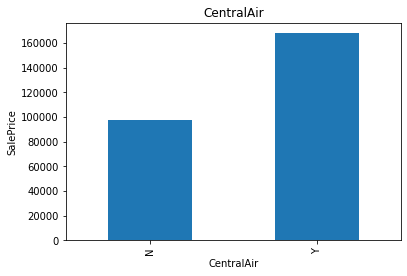

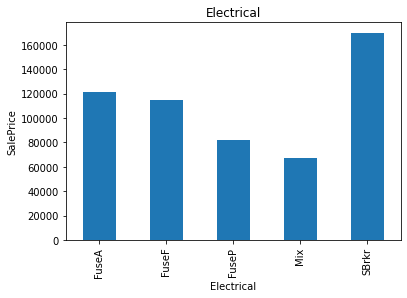

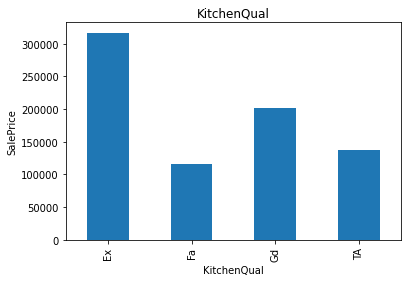

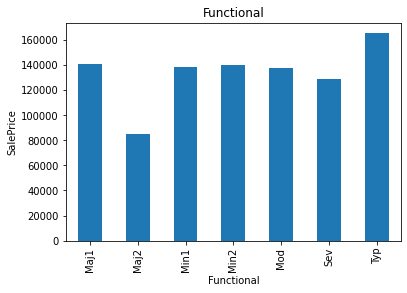

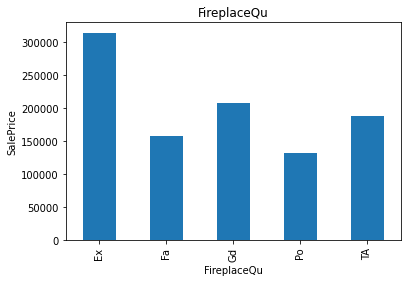

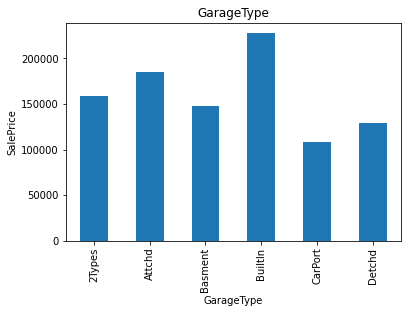

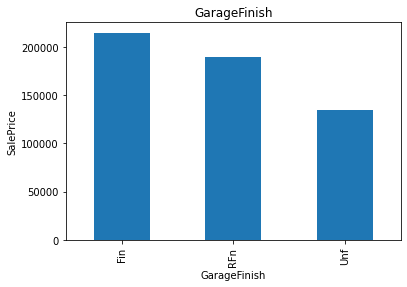

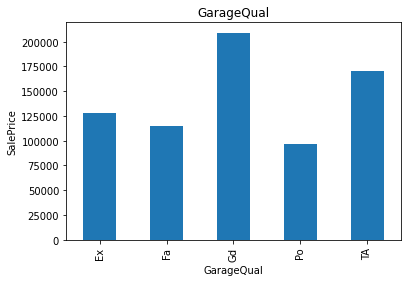

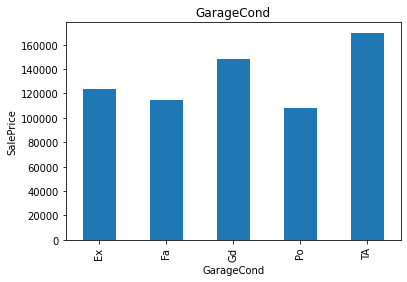

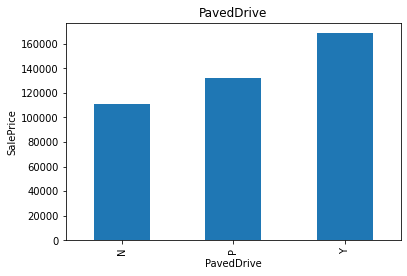

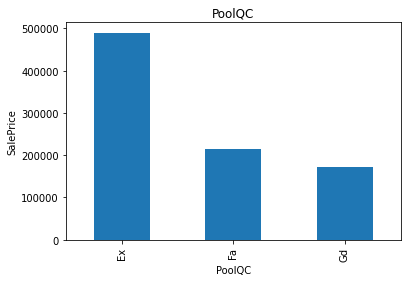

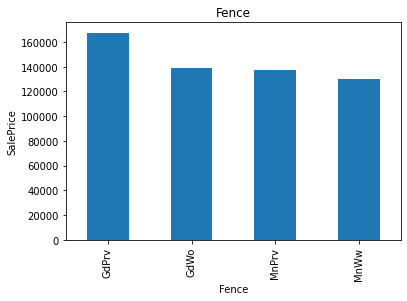

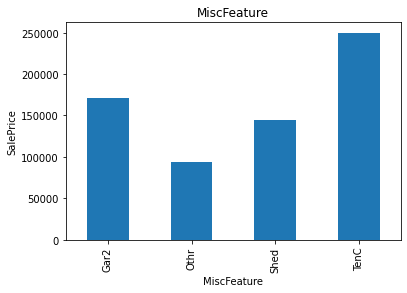

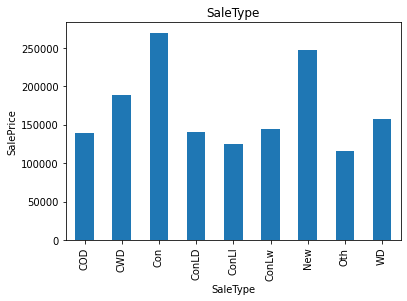

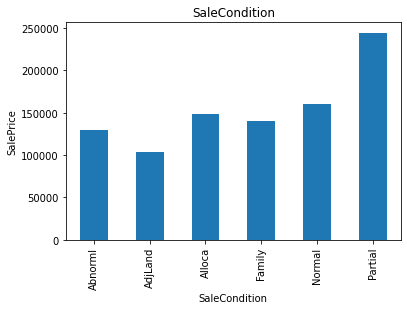

In [409]:
for feature in categorical_features:
  data = df_train.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

# **Feature Engineering**

In this section, we will handle:
1. Dropping unneccessary feature
2. Missing Values
3. Temporal Variables
4. Categorical features
5. Standardization of values




### **Data Leakage**
For kaggle competetions we combine the test data and train data and perform feature engineering on combined data.
Later we split the test and train data, sometimes during this process, some test data goes in train data and vice-versa which is called **Data Leakage**.
In this dataset, I will perform feature engineering seperately on test and train data to avoid any Data Leakage and reduce the overfitting of model.

## **Dropping unnecessary feature**


*   ID of homes



In [410]:
# df_train.drop(columns=['Id'], inplace=True)

## **Missing values**

### Handling missing/Nan values in **Categorical features** 


### Finding **Categorical features** with missing values

In [411]:
# Make a seperate list for all the categorical feature that have missing values and percentage of missing values
categorical_features_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes == 'O']

#Print the percentage of missing values in categorical features
for feature in categorical_features_nan:
  print('{}: {}% of missing values'.format(feature, np.round(df_train[feature].isnull().mean(),4)))


Alley: 0.9377% of missing values
MasVnrType: 0.0055% of missing values
BsmtQual: 0.0253% of missing values
BsmtCond: 0.0253% of missing values
BsmtExposure: 0.026% of missing values
BsmtFinType1: 0.0253% of missing values
BsmtFinType2: 0.026% of missing values
FireplaceQu: 0.4726% of missing values
GarageType: 0.0555% of missing values
GarageFinish: 0.0555% of missing values
GarageQual: 0.0555% of missing values
GarageCond: 0.0555% of missing values
PoolQC: 0.9952% of missing values
Fence: 0.8075% of missing values
MiscFeature: 0.963% of missing values


As evident some features have lot of missing values:
* **Alley**: 0.9377% of missing values
* **FireplaceQu**: 0.4726% of missing values
* **PoolQC**: 0.9952% of missing values
* **MiscFeature**: 0.963% of missing values




### Replacing missing/Nan values with a new label **"Missing"** for all categorical features

In [412]:
##Replace all missing/Nan values with "Missing" label
def replace_cat_feature(df, categorical_features_nan):
  data = df.copy()
  data[categorical_features_nan] = data[categorical_features_nan].fillna('Missing')
  return data


In [413]:
#Sending dataframe and list of features with missing/Nan values
df_train = replace_cat_feature(df_train,categorical_features_nan)

In [414]:
#Check if any missing/Nan values left in the df_train
df_train[categorical_features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [415]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


### Handling missing/Nan values in **Numerical features** 


### Finding **Numerical features** with missing values

In [416]:
# Make a seperate list for all the numerical feature that have missing values and percentage of missing values
numeric_features_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes != 'O']

#Print the percentage of missing values in numerical features
for feature in numeric_features_nan:
  print('{}: {}% of missing values'.format(feature, np.round(df_train[feature].isnull().mean(),4)))

LotFrontage: 0.1774% of missing values
MasVnrArea: 0.0055% of missing values
GarageYrBlt: 0.0555% of missing values


In [417]:
df_train.shape

(1460, 81)

### Replacing missing/Nan values with **median values** for all numerical features

* In EDA, we noticed a lot of outliers so we will go with median and not mean.
* In this process, we will also create an extra feature where we will map the missing value row with 1 and non-missing value  with 0.

In [418]:
for feature in numeric_features_nan:
  
  # Calculate the median value for the feature
  median_value = df_train[feature].median()

  # Create a new feature to map missing value row as 1 and non-missing value as 0
  df_train[feature + 'nan'] = np.where(df_train[feature].isnull,1,0)

  # Replace all missing values in feature with Median value
  df_train[feature].fillna(median_value, inplace=True)

In [419]:
df_train.shape

(1460, 84)

In [420]:
#Checking the percentage of missing values in numerical features
for feature in numeric_features_nan:
  print('{}: {}% of missing values'.format(feature, np.round(df_train[feature].isnull().mean(),4)))

LotFrontage: 0.0% of missing values
MasVnrArea: 0.0% of missing values
GarageYrBlt: 0.0% of missing values


In [421]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,1,1,1
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,1,1,1
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,1,1,1
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,1,1,1
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,1,1,1


## **Temporal variable (E.g. Datatime Variable)**

* In Feature Engineering part, we will replace the year value with number of year difference from Year sold of the house.

* We have all the year features in *year_features* list from EDA.

In [422]:
for feature in year_features:
  if feature!= 'YrSold':

    #Calculate the difference of years between selected feature and the year house was sold
    df_train[feature]=df_train['YrSold'] - df_train[feature]

# Dropping Year sold feature
df_train.drop(columns=['YrSold'], inplace=True)

In [423]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,WD,Normal,208500,1,1,1
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,WD,Normal,181500,1,1,1
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,WD,Normal,223500,1,1,1
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,WD,Abnorml,140000,1,1,1
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,WD,Normal,250000,1,1,1


## **Transformations on skewed numerical data**

* In Feature Engineering part, we will apply logarithmic transformation on skewed numerical data

* We can only consider **continuous numerical features** for this.
* We have to check that selected features **do not have 0** as a value in them before applying Logarithmic transformation.


In [424]:
# Create a seperate list for num_features from continuous_features made in EDA
num_features = [feature for feature in continuous_features if 0 not in df_train[feature].unique()]

print('num_features are: ')
num_features


num_features are: 


['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [425]:
#Applying Logarithmic transformation on num_features
for feature in num_features:
  df_train[feature] = np.log(df_train[feature])

In [426]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,WD,Normal,12.247694,1,1,1
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,WD,Normal,12.109011,1,1,1
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,WD,Normal,12.317167,1,1,1
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,WD,Abnorml,11.849398,1,1,1
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,WD,Normal,12.429216,1,1,1


## Handling **Rare Categorical features**

* We will calculate %tage of distinct categories present in each categorical feature.
* If this %tage is less than 1%, we will replace it with a new label.
* This way we will reduce the number of less frequest categories in the dataset

In [427]:
print('Continuous features are: ')
categorical_features

Continuous features are: 


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [428]:
for feature in categorical_features:
  
  #Calculate the %tage of multiple categories in that feature compared to all categories in the dataset
  temp = df_train.groupby(feature)['Id'].count()/len(df_train)
  
  #finding the index number of categories more than 1% of all categories in the dataset
  temp_df = temp[temp>0.01].index

  #Replacing rare categories with "Rare_var" in the entire dataset
  df_train[feature] = np.where(df_train[feature].isin(temp_df), df_train[feature], 'Rare_var')

In [429]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,WD,Normal,12.247694,1,1,1
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,WD,Normal,12.109011,1,1,1
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,WD,Normal,12.317167,1,1,1
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,WD,Abnorml,11.849398,1,1,1
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,WD,Normal,12.429216,1,1,1


## Encoding **Categorical features** with Mean Encoding

[Read more....](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)

In [440]:
for feature in categorical_features:
    labels_ordered=df_train.groupby([feature])['SalePrice'].mean().sort_values().index
    print(labels_ordered)
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_train[feature]=df_train[feature].map(labels_ordered)

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='MSZoning')
Int64Index([0, 1], dtype='int64', name='Street')
Int64Index([0, 1, 2], dtype='int64', name='Alley')
Int64Index([0, 1, 2, 3], dtype='int64', name='LotShape')
Int64Index([0, 1, 2, 3], dtype='int64', name='LandContour')
Int64Index([0, 1], dtype='int64', name='Utilities')
Int64Index([0, 1, 2, 3, 4], dtype='int64', name='LotConfig')
Int64Index([0, 1, 2], dtype='int64', name='LandSlope')
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22],
           dtype='int64', name='Neighborhood')
Int64Index([0, 1, 2, 3, 4, 5], dtype='int64', name='Condition1')
Int64Index([0, 1], dtype='int64', name='Condition2')
Int64Index([0, 1, 2, 3, 4], dtype='int64', name='BldgType')
Int64Index([0, 1, 2, 3, 4, 5], dtype='int64', name='HouseStyle')
Int64Index([0, 1, 2], dtype='int64', name='RoofStyle')
Int64Index([0, 1], dtype='int64', name='RoofMatl')
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

In [431]:
labels_ordered

{'Abnorml': 0, 'Family': 2, 'Normal': 3, 'Partial': 4, 'Rare_var': 1}

In [432]:
df_train.shape

(1460, 83)

## **Feature Scaling**

* We will make a seperate list of features we want to apply scaling too (exlude dependent feature i.e. Sale Price)
* Apply Normalization to bring the data value between 0 and 1 using *MinMax Scaler* library

In [433]:
feature_scale = [feature for feature in df_train.columns if feature not in ['Sale Price']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[feature_scale])

scaler.transform(df_train[feature_scale])

array([[0.00000000e+00, 2.35294118e-01, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.85400960e-04, 0.00000000e+00, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37080192e-03, 2.35294118e-01, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.98629198e-01, 2.94117647e-01, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99314599e-01, 0.00000000e+00, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 7.50000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [434]:
#As we get the output after applying Feature scaling in form of an array, we will create a dataframe (final_df_train) and add Sale Price values from old df_train.
final_df_train = pd.concat([df_train[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_train[feature_scale]), columns=feature_scale)],
                    axis=1)

In [435]:
#Training dataset is ready
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2,3,12.247694,1,1,1
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2,3,12.109011,1,1,1
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2,3,12.317167,1,1,1
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2,0,11.849398,1,1,1
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2,3,12.429216,1,1,1


# **Saving the final train data to csv**

In [436]:
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data'
df_train.to_csv(path_to_csv_folder + '/final_train.csv', index=False)

# **Applying feature engineering to Test Data**

In [439]:
print('Test data shape:{}'.format(df_test.shape))
df_test.head(5)

Test data shape:(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Difference in number of categories for multiple features in Training and Testing datasets

In [501]:
len(df_train['LotShape'].unique())

4

In [502]:
len(df_test['LotShape'].unique())

4

In [500]:
for feature in categorical_features:
  category_difference = (len(df_train[feature].unique()) - len(df_test[feature].unique()))
  if category_difference != 0:
    non_zero_cat_diff = category_difference
  print('Difference in distinct categories in Train and Test dataset is: {} - {}'.format(feature, non_zero_cat_diff))

Difference in distinct categories in Train and Test dataset is: MSZoning - -1
Difference in distinct categories in Train and Test dataset is: Street - -1
Difference in distinct categories in Train and Test dataset is: Alley - -1
Difference in distinct categories in Train and Test dataset is: LotShape - -1
Difference in distinct categories in Train and Test dataset is: LandContour - -1
Difference in distinct categories in Train and Test dataset is: Utilities - -1
Difference in distinct categories in Train and Test dataset is: LotConfig - -1
Difference in distinct categories in Train and Test dataset is: LandSlope - -1
Difference in distinct categories in Train and Test dataset is: Neighborhood - -1
Difference in distinct categories in Train and Test dataset is: Condition1 - -1
Difference in distinct categories in Train and Test dataset is: Condition2 - 3
Difference in distinct categories in Train and Test dataset is: BldgType - 3
Difference in distinct categories in Train and Test datas

In [378]:
# features_with_na=[features for features in df_test.columns if df_test[features].isnull().sum()>1]

# numerical_features = [feature for feature in df_test.columns if df_test[feature].dtype != 'O']

# year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

# discrete_features = [feature for feature in numerical_features if len(df_test[feature].unique())<25 and feature not in year_features + ['Id']]

# continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features + ['Id']]

# categorical_features = [feature for feature in df_test.columns if df_test[feature].dtype == 'O']

# categorical_features_nan = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes == 'O']


# df_test = replace_cat_feature(df_test,categorical_features_nan)

# numeric_features_nan = [feature for feature in df_test.columns if df_test[feature].isnull().sum()>1 and df_test[feature].dtypes != 'O']

# for feature in numeric_features_nan:
  
#   # Calculate the median value for the feature
#   median_value = df_test[feature].median()

#   # Create a new feature to map missing value row as 1 and non-missing value as 0
#   df_test[feature + 'nan'] = np.where(df_test[feature].isnull,1,0)

#   # Replace all missing values in feature with Median value
#   df_test[feature].fillna(median_value, inplace=True)



# for feature in year_features:
#   if feature!= 'YrSold':

#     #Calculate the difference of years between selected feature and the year house was sold
#     df_test[feature]=df_test['YrSold'] - df_test[feature]

# # Dropping Year sold feature
# df_test.drop(columns=['YrSold'], inplace=True)

# num_features = [feature for feature in continuous_features if 0 not in df_test[feature].unique()]


# for feature in categorical_features:
  
#   #Calculate the %tage of multiple categories in that feature compared to all categories in the dataset
#   temp = df_test.groupby(feature)['Id'].count()/len(df_test)
  
#   #finding the index number of categories more than 1% of all categories in the dataset
#   temp_df = temp[temp>0.01].index

#   #Replacing rare categories with "Rare_var" in the entire dataset
#   df_test[feature] = np.where(df_test[feature].isin(temp_df), df_test[feature], 'Rare_var')


# # Mean Encoding by mapping values created at the time of training.
# for feature in categorical_features:
#   df_test[feature]=df_test[feature].map(labels_ordered) 


# #Normalize the test set using the training normalization parameters
# feature_scale = [feature for feature in df_test.columns if feature not in ['Sale Price']]
# scaler.transform(df_test[feature_scale])



In [ ]:
df_test

In [ ]:
#Testing dataset is ready
df_test.head()

In [ ]:
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data'
final_test_df.to_csv(path_to_csv_folder + '/final_test.csv', index=False)

# **Feature Selection**

We will use **Lasso Regression** and **SelectFromModel** to select relevent features.

## Load **Final Train Data** from csv

In [ ]:
path_to_csv_folder = '/content/drive/MyDrive/Colab Notebooks/Explotatory Data Analysis/Advance House pricing prediction/Data'
df_train = pd.read_csv(path_to_csv_folder + '/final_train.csv')

In [ ]:
df_train.head()

## Capture dependent and independent feature

In [ ]:
#The dependent feature
y_train = df_train[['SalePrice']]

In [ ]:
#The independent feature
X_train = df_train.drop(['SalePrice'], axis=1)

## Applying SelectFrom and Lasso Regression for feature selection

[Read more...](https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499)

In [ ]:
# Specify the Lasso Regression model and select a suitable alpha value
# The bigger the alpha, lesser number of features will be selected

# SelectFromModel will select features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) #set the seed value and use it in test data run
feature_sel_model.fit(X_train, y_train)

In [ ]:
feature_sel_model.get_support()



*   **True** indicates the features is important and should be used
*   **False** indicates the features is not important and can be skipped (whose weights were shrinked to zero and are not important according to Lasso)  



## **Selected** features and **Dropped** features

In [ ]:
# make a seperate list for selected features
selected_features = X_train.columns[(feature_sel_model.get_support())]

# make a seperate list for dropped features
dropped_features = X_train.columns[(feature_sel_model.estimator_.coef_ == 0).ravel().tolist()]

# print number of selected features and dropped features
print('total features: {}'.format((X_train.shape[1])))
print('total selected features: {}'.format(len(selected_features)))
print('total dropped features: {}'.format(len(dropped_features)))

In [ ]:
print(selected_features)

In [ ]:
print(dropped_features)

### New Training dataset

In [ ]:
# Remove all dropped features from training dataset and stopre only selected features
X_train = X_train[selected_features]

In [ ]:
X_train.shape

### Correlation values on new training dataset

In [ ]:
X_train.corr()

### Correlation using Pearson Correlation

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
df_train.shape

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
df_test.shape

In [ ]:
df_train['SalePrice'].head()

In [ ]:
New_feat_in_Train